> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> In this project, we looked at dataset from 100k medical appointments in Brazil and tried answer questions a number of characteristics that would influence whether or not patients show up for their appointment. the dataset has 14 columns namely PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age,	Neighbourhood, Scholarship,	Hipertension, Diabetes, Alcoholism,	Handcap, SMS_received, and No-show. This data table presents patient biodata, scheduled appointment, and remarks on wether or not they show up for thier appointment. Hence, "No-show" is dependent variable while others are independent variaables for this project.


### Question(s) for Analysis
>For this analysis we would explore questions on whether patients enrolment in welfare scheme (scholarship) results in showing up for appoints. Also, we plan on exploring the question of gender responsiveness to medical appointment over the course of the report. 

In [1]:
# import libaries needed for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib as plt
% matplotlib inline
import seaborn as sns

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# load No-show appointments data into data frame
df = pd.read_csv('no_show_appointments.csv')


In [3]:
# display the shape and first five rows of data 
print(df.shape)
df.head()

(110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# this returns the datatypes of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
# this displays a concise summary of the dataframe,
# including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# this returns useful descriptive statistics for each column of data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

We will clean up the data in the following sequence:

i. Correct header to reflect correct spellings
ii. Convert 'PatientId' to string datatype as no calculation needs to be done on means of identity
iii. Drop AppointmentID column
iv. Convert ScheduledDay and AppointmentDay from 'object' type to 'datetime'

In [7]:
# Rename column header names spelt wrongly.
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'}, inplace=True)

# confirm changes
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [8]:
# convert PatientId column to String
df['PatientId'] = df['PatientId'].astype(str)

# confirm changes
type(df['PatientId'][0])

str

In [9]:
# Drop AppointmentID column 
df.drop(['AppointmentID'], axis=1, inplace=True)

# confirm changes
df.head(1)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,2.98724998243e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [10]:
# Convert ScheduledDay and AppointmentDay from 'object' type to 'datetime'
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

Now we will check the overall clean with the code line below:

In [11]:
# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
PatientId         110527 non-null object
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMSReceived       110527 non-null int64
NoShow            110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(4)
memory usage: 11.0+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Do we have more scholarship enrolee show up for appointment? )

In [12]:
# getting unique output of Scholarship column
df.Scholarship.unique()

array([0, 1])

In [13]:
# select samples with Scholarship content less than or equal to the relevant array value
No_Scholarship = df.query('Scholarship <= 0')

# select samples with Scholarship content greater than or equal to the relevant array value
With_Scholarship = df.query('Scholarship >= 1')

# running/testing query logic of samples
num_samples = df.shape[0]
num_samples == No_Scholarship['NoShow'].count() + With_Scholarship['NoShow'].count()

True

In [14]:
# get count of NoShow for the no scholarship and with scholarship groups
No_Scholarship['NoShow'].count(), With_Scholarship['NoShow'].count()

(99666, 10861)

In [ ]:
From the above, we infer that score "0" implies not enrolled while "1" implies enrolled in welfare scheme. 

### Research Question 2  (What is the age distribution of patients?)

In [15]:
# get the average age of patience
df.Age.mean()

37.088874211731067

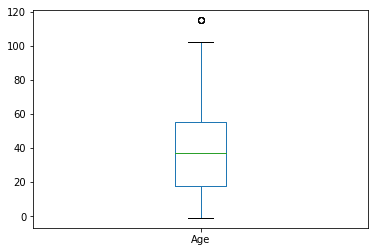

In [16]:
# plot spread of Age
df['Age'].plot(kind='box');

From the above, the average age of patients is approx. 37years.

### Research Question 2  (What is the ratio of Male and Female that shows up for appointmen?)

In [17]:
# getting unique output of Gender column
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [18]:
#show breakdown of Noshow ouput count
df.groupby('NoShow').size()

NoShow
No     88208
Yes    22319
dtype: int64

[]

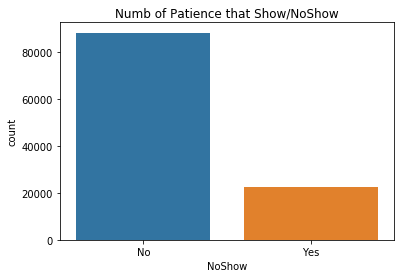

In [19]:
# Plot show/NoShow
dv = sns.countplot(x=df.NoShow, data=df)
dv.set_title("Numb of Patience that Show/NoShow")
x_ticks_labels=['No', 'Yes']
dv.set_xticklabels(x_ticks_labels)
dv.plot(kind = 'bar')

In [20]:
# show further breakdown by gender and noshow
df2= df.groupby(['Gender', 'NoShow'])['Gender'].size()
df2.head()


Gender  NoShow
F       No        57246
        Yes       14594
M       No        30962
        Yes        7725
Name: Gender, dtype: int64

From the above, the addition of "No" and "Yes" values output gives 110527 which is consistent with our data shape size

[]

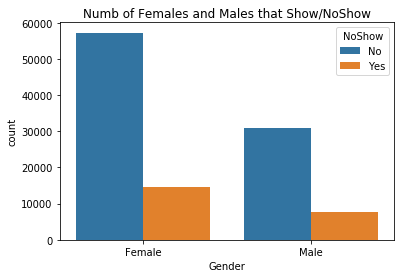

In [56]:
# visualize appointment response by gender 
dv = sns.countplot(x=df.Gender, hue=df.NoShow, data=df)
dv.set_title("Numb of Females and Males that Show/NoShow")
x_ticks_labels=['Female', 'Male']
dv.set_xticklabels(x_ticks_labels)
dv.plot(kind = 'bar')

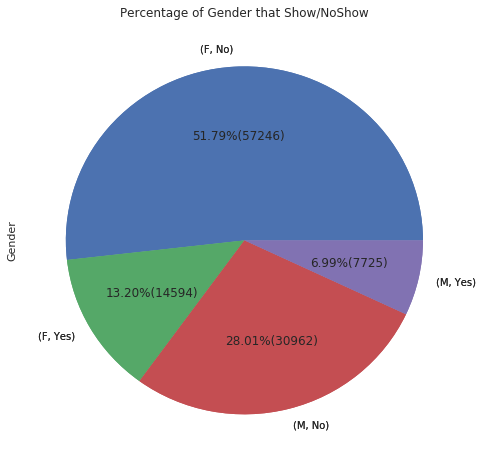

In [21]:
# Creating dataset
df2= df.groupby(['Gender', 'NoShow'])['Gender'].size()

sns.set()
df2.plot(kind='pie', title='Percentage of Gender that Show/NoShow', figsize=[8,8],
          autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*df2.sum()))
df2.plot(kind = 'pie');


From the above, we can see that greater number of patients didn't show up for their appointmeent. breaking it down further shows that females constitute the larger ratio despite booking the most appointment.

<a id='conclusions'></a>
## Conclusions

> The result shows that fewer patients are enrolled for welfare scheme and does not suggest motivation for patients showing up for appointment. Also, Gender may be a determinant for engagement as more female book more appointment than male whereas this does not lead to signicant show-up/appointment ratio. 

> However, future analysis may further inspect and code the dependent variable as numeric in a separate column to determine correllation/causation.

> limititation of the report is that dependent variable is text format such that correlation test with other variables cannot be readily checked

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])